In [52]:
#importing pandas for data processing, specifically for csv file
import pandas as pd
#importing np for linear algebra
import numpy as np 

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
%matplotlib inline

In [32]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='chol'>

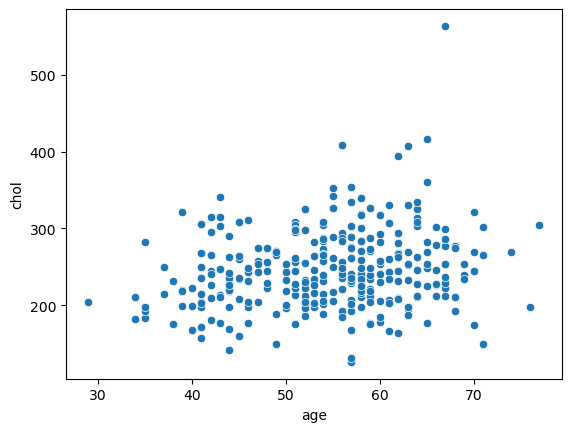

In [34]:
sns.scatterplot(x='age',y='chol',data=df)


<AxesSubplot:xlabel='cp', ylabel='age'>

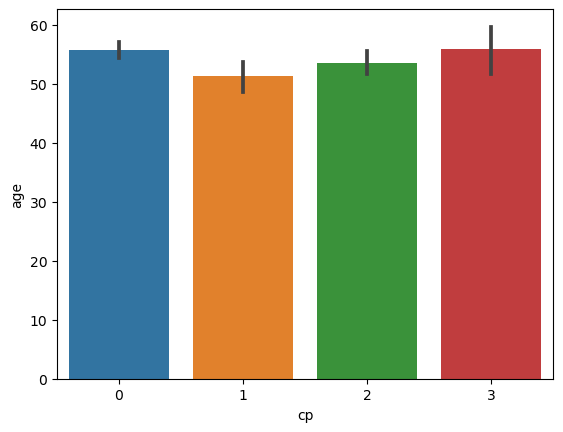

In [35]:
sns.barplot(x='cp',y='age',data=df)

<AxesSubplot:xlabel='output', ylabel='cp'>

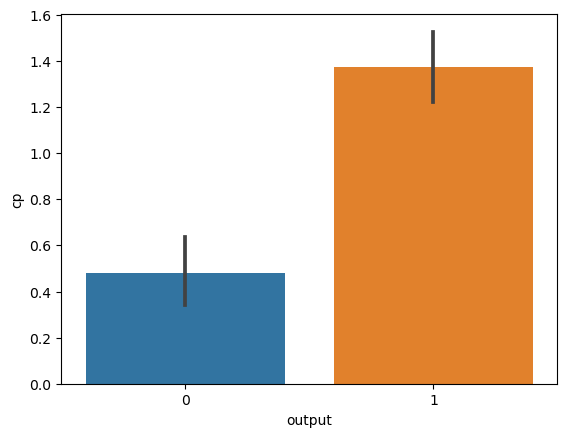

In [36]:
sns.barplot(x='output',y='cp',data=df)

In [37]:
x = df.drop(['output'],axis=1)
y = df['output']

In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

In [40]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [41]:
lr.score(xtest,ytest)

0.8852459016393442

<AxesSubplot:>

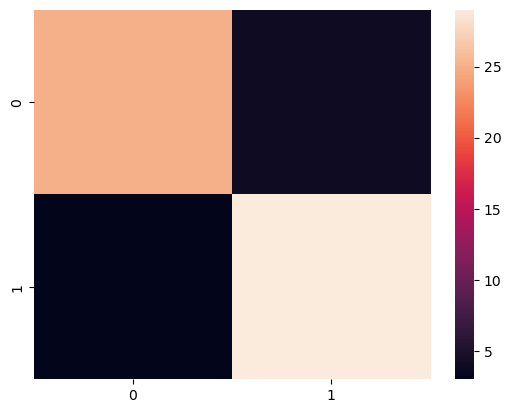

In [42]:
yp = lr.predict(xtest)
c = confusion_matrix(ytest,yp)
sns.heatmap(c)

In [43]:
sv = SVC()
sv.fit(xtrain,ytrain)

SVC()

In [44]:
sv.score(xtest,ytest)

0.8688524590163934

In [45]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [46]:
rfc.score(xtest,ytest)

0.8524590163934426

In [47]:
from sklearn.model_selection import cross_val_score
rfm = cross_val_score(rfc,X=xtrain,y=ytrain,cv=10)
rfm.mean()

0.818

In [48]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [49]:
kn.score(xtest,ytest)

C:\Users\ok\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9016393442622951

In [50]:
df.head(1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [51]:
a = [[29,1,0,120,190,0,1,130,1,1.3,0,0,0]]
kn.predict(a)

C:\Users\ok\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1], dtype=int64)